# Text Classification with Naive Bayes Classifier

In this notebook, we will use Naive Bayes classifier for classifying text.

Naive Bayes classifier is used for text classification and spam detection tasks.

Here is an example as how to perform text classification with Naive Bayes Classifier.

In [1]:
# Common imports
import numpy as np

# plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data loading
from sklearn.datasets import fetch_20newsgroups

# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# Model/estimator
from sklearn.naive_bayes import MultinomialNB

# Pipeline Utility
from sklearn.pipeline import make_pipeline

For some background on `TfidVectorizer` refer to this [link](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

# Dataset

We will be using the $20$ newsgroup dataset for classification.

As a first step, let's download the dataset with `fetch_20newsgroups` API.

In [3]:
data = fetch_20newsgroups()

Let's look at the names of the classes.

In [4]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Classifying $4$ categories

As we can see, this dataset has **20 categories** in the dataset. For simplicity, we will select $4$ of these categories and classify.

In [5]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='train', categories=categories)

Let's look at a sample training document:

In [11]:
print(train.data[10])

From: mussack@austin.ibm.com (Christopher Mussack)
Subject: Re: Questioning Authority
Lines: 60

Despite my trendy, liberal, feminist tendencies and the fact
that I basically agree with what you are saying I will rebut:

(Dr Nancy's Sweetie) writes:
> (Chris Mussack) writes:
> > For all those people who insist I question authority: Why?
> ...
> Authorities sometimes tell people to do evil things.  People who "just
> follow orders" have tortured and killed others in very large numbers,
> and protest their innocence afterwards.
 
The basic question here is "how do I know what I am supposed to do?"
This is true in every situation that comes up. Some people do not
think about it at all and merely follow their impulses. I claim
that is just as dangerous as "following authority". I could site
sexually transmitted diseases, drug abuse, all manner of criminal
activity, the savings and loan scandal, car accidents, eggs thrown
at my house, all are examples of people not "following authority".
I 

In [12]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

The data is different from the usual in the sense that it is not represented by no.s but by strings. Here the training data contains document in text form.

# Data Preprocessing and Modelling

Firstly, we need to convert this data into numeric form.

`TfidVectorizer` is one such API that converts text inputs into a vector of numeric values.

We will use `TfidVectorizer` as a preprocessing step to obtain featyre vector corresponding to the text document. We will be using multinomial Naive Bayes' classifier for categorizing documents from `20newsgroup` corpus.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

Let's train the model.

In [14]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

# Model Evaluation

Let's first predict the labels for the test set and then calculate the confusion matrix for the test data.

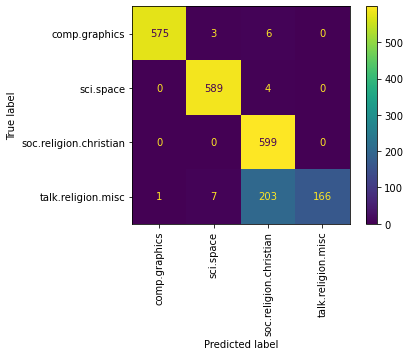

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

cmat = ConfusionMatrixDisplay.from_estimator(
    model,
    test.data,
    test.target,
    display_labels=test.target_names,
    xticks_rotation='vertical'
)
plt.show()

Observe that:
- There is a confusion between documents of class `soc.religion.christian` and `talk.religion.misc` which is along the expected lines.
- The classes `comp.graphics` and `sci.space` are well separated by such a simple classifier.

Now, we have a tool to classify statements into one of these $4$ classes.
> Make use of `predict` function on pipeline for predicting category of a test string.

In [17]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Now, we use the above function for prediction:

In [18]:
predict_category('sending a payload to the ISS')

'sci.space'

In [19]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [20]:
predict_category('determining screen resolution')

'comp.graphics'

As we can see, this is predicting well for this $4$ class classification.

We can also try to employ a full fledged prediction for all the $20$ classes as well.

# Classifying all $20$ categories

In [21]:
data = fetch_20newsgroups()

In [23]:
# We are not using any test data.
X,y = data.data, data.target

In [27]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

In [29]:
model.fit(X,y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

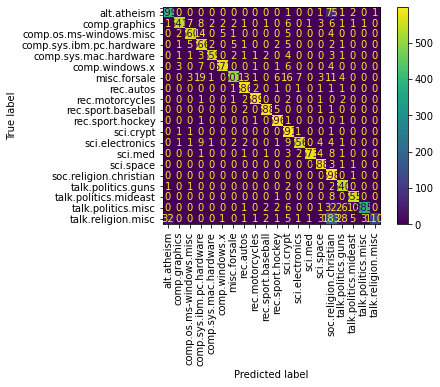

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

cmat = ConfusionMatrixDisplay.from_estimator(
    model,
    X,
    y,
    display_labels=data.target_names,
    xticks_rotation='vertical',
)
plt.show()

In [39]:
target_names = data.target_names

def predict_category(s, model=model):
    pred = model.predict([s])
    return target_names[pred[0]]

Now, we use this model to predict the topic relevant to some test phrases.

In [45]:
predict_category('Water was discovered on Moon')

'sci.space'

In [46]:
predict_category('We can live in mars in a few years')

'sci.space'

In [48]:
predict_category('The latest macbook by Apple is the best')

'comp.sys.mac.hardware'

In [ ]:
%%time